# **DATA PROJECT 2024: DO INTERENATIONAL WORKERS IN DENMARK REMEDY LABOR SHORTAGE?**

By Emma Knippel, Anna Abildskov and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Introduction](#toc1_) 

* [Read and clean data](#toc2_)    

* [Exploring the data sets](#toc3_)    

* [Merging data sets of employment and international labor](#toc4_)   

* [Analysis](#toc5_) 

* [Conclusion](#toc6_) 

## <a id='toc0_'></a>[Setup](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import json

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


In [2]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import dataproject #importing our own py-file with our code.

  Cloning https://github.com/alemartinello/dstapi to c:\users\oscar\appdata\local\temp\pip-req-build-j3omc362
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\oscar\AppData\Local\Temp\pip-req-build-j3omc362'


Note: you may need to restart the kernel to use updated packages.


## <a id='toc1_'></a>[Introduction](#toc1_)

Our data project takes its basis in one of the biggest political issues in Denmark at the moment: labor shortage. The labor shortage in the entirety of Europe has grown rapidly in the last five years, and naturally, Denmark is no exception. One of the key efforts to combat this issue is the reqruitment of international workers.

Statistics Denmark (DST) produces an interview-based statistic that measures labor shortage in a given sector or industry by the share of firms therein could increase production if they had the necessary labor force. This allows us to see the development in labor shortage over time, as well as compare the number of international workers in each field to the labor shortage. Thus, we can deduce how much interenational workers remedy the problem, if they are present in industries where it is difficult to reqruit Danes, as well as where it makes sense to put in a higher effort in order to reqruit more.

## <a id='toc1_'></a>[Read and clean data](#toc1_)

In this section, we import data and clean it for usage later on. Our data comes from two different sources: Statistics Denmark and Jobindsats (STAR). 

We import four different datasets from DST through API: production limitations in the sectors of manufacturing, construction, and service and amount employees in all industries and sub-industries. The production limititations will give us the data we need regarding labor shortage in all different industries and sub-industries. 

From STAR, we download a JSON file, which is stored locally in this folder. This file contains data on the amount of international employees in sub-industries in the service sector, which we will need for comparing the share of international employees to laber shortage. 


In [3]:
# importing the data from DST
employees = DstApi('LBESK03')
lb_short_service = DstApi('KBS2')
lb_short_manu = DstApi('BARO3')
lb_short_cons = DstApi('KBYG33')

**Cleaning all five datasets**

The code for the cleaning of all datasets, along with comments of the process, can be found in the seperate dataproject.py file. 

In [4]:
int_labor = dataproject.clean_json_data()
int_labor.head(5)

Before cleaning, the JSON datafile from JobIndsats contains 1089 observations and 5 variables.
We have removed two columns and renamed the remaining.
The dataset now contains 1089 observations and 3 variables.
All our observations are of type: <class 'str'>. We want them to be integers.
The observations are now of type: <class 'numpy.float64'> and the first observation is: 2.184
The observations are now of type: <class 'numpy.int32'> and the first observation is: 2184
We convert our time Variable into datetime variables.
We now convert the DataFrame using the .pivot method, using time as index, industries as columns and international labor as our observations.
All our industries are in Danish, so we rename them to English.
For our dataset to match the data from DST, we sum over all industries to get the total and combine four of the industires so that they match
Lastly, we drop the industries, that we have just combined to make new ones.
The cleaned dataset now contains 8 columns (indu

industry,hotels_restaurents,information_communictaion,cleaning_etc,transport,research_consultancy,total,finance_real_estate,culture_leisure_other
time,,,,,,,,
2014-01-01,17609,6657,26549,14777,9039,86158,4684,6843
2014-02-01,17957,6815,26792,14732,9137,86993,4690,6870
2014-03-01,18481,7001,27667,14975,9292,89550,4841,7293
2014-04-01,19209,7136,28547,15177,9611,92029,4928,7421
2014-05-01,19909,7342,29802,15380,9539,94728,5103,7653


In [5]:
empl = dataproject.clean_dst_empl(employees)
empl.head(5)

Since we have extracted all the data from the source on DST, we need to select only the variables that are relevant for our analysis
For the employment data, we first define our parameters so that we get only data from january 2014 to january 2024 and only for the total of industries.
Then, we retract the parameters we defined, into our DataFrame, drop the industry since we do not need to split the data on industry, and rename the columns to english, simple titles.
The cleaned dataset contains 2 columns and 121 observations.


,time,employees
0,2014M01,2561675
1,2014M02,2563945
2,2014M03,2566733
3,2014M04,2569268
4,2014M05,2570962


In [6]:
lab_short_service = dataproject.clean_dst_shortage1(lb_short_service)
lab_short_service.head(5)

Again, as for all the DST data, we need to select only the variables that are relevant for our analysis
For the labor shortage data, we need to sort through the dataset a bit more when defining out variables:
We need to specify which industries we want to get data from, since the dataset contains both broad and narrow categories.
Furhtermore, we want to get data only for the labor shortage and from january 2014 to january 2024.
We retrieve the parameters and sort the data by time and industry.
Then, we drop the column, TYPE, since we only have data for the labor shortage anyways, and this column would otherwise be used to split the data into diffeereeent categories of production limitations.
We also drop the old index and reset it.
We rename the industry codes to the industry names, so that they match the industries in the international labor data.
We convert the time variable into datetime variables.
The cleaned dataset contains 3 columns and 968 observations.


,industry,time,labor_shortage
0,culture_leisure,2014-01-01,6
1,cleaning_etc,2014-01-01,13
2,information_communication,2014-01-01,9
3,research_consultancy,2014-01-01,19
4,finance_real_estate,2014-01-01,0


In [7]:
lab_short_manu = dataproject.clean_dst_shortage2(lb_short_manu)
lab_short_manu.head(5)

Again, as for all the DST data, we need to select only the variables that are relevant for our analysis
We retreieve the parameters we defined into the DataFrame and sort the variables by time.
We then rename the columns to english, simple titles and reset the index.
We drop the industry and type columns, since we onle neeed data for the total industry
Finally, we set the time variable to datetime variables.
The cleaned dataset contains 2 columns and 41 observations.
The reason that the number of observations differ, is that manufacturing labor shortagae data is only publishedc once a quarter.


,time,labor_shortage
0,2014-01-01,1
1,2014-04-01,3
2,2014-07-01,2
3,2014-10-01,3
4,2015-01-01,2


In [8]:
lab_short_cons = dataproject.clean_dst_shortage3(lb_short_cons)
lab_short_cons.head(5)

The method for the cleaning of this dataset is exactly the same as for the manufacturinng sector.
The cleaned dataset contains 2 columns and 121 observations.


,time,labor_shortage
0,2014-01-01,3
1,2014-02-01,2
2,2014-03-01,3
3,2014-04-01,3
4,2014-05-01,2


## Explore each data set

In this section we explore the cleaned datasets and use these as the basis of our analysis. 

**1.1) Development of labor shortage by industry**

A static graph showing the development of labor shortage for the timeperiod Janurary 2014 - January 2024, of all three sectors; manufacturing, construction, and service. 

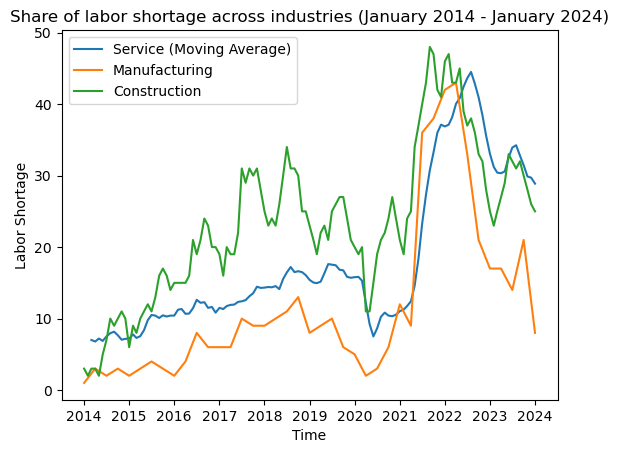

In [9]:
# Converting the 'time' column into datetime format and calculating a moving average for the service industry
lab_short_service['time'] = pd.to_datetime(lab_short_service['time'], format='%Y-%m-%d')
average_labor_shortage = lab_short_service.groupby('time')['labor_shortage'].mean()
moving_average = average_labor_shortage.rolling(window=3).mean()
lab_short_manu['time'] = pd.to_datetime(lab_short_manu['time'], format='%Y-%m-%d')
lab_short_cons['time'] = pd.to_datetime(lab_short_cons['time'], format='%Y-%m-%d')

# Plotting the data for all three industries
plt.plot(moving_average, label='Service (Moving Average)')
plt.plot(lab_short_manu['time'], lab_short_manu['labor_shortage'], label='Manufacturing')
plt.plot(lab_short_cons['time'], lab_short_cons['labor_shortage'], label='Construction')

plt.xlabel('Time')
plt.ylabel('Labor Shortage')
plt.title('Share of labor shortage across industries (January 2014 - January 2024)')
plt.legend()

plt.show()

All three industries have an upward trend until the middle of 2019, after which we see a dive, culminating in early to mid- 2020. This is the period when the coronavirus shut down Denmark. In the period 2014-2020, the upward trend in the service industry is the most stable, while the other two industries are somewhat more volatile in their trend. After that, we see a steep upward trend for all three industries. This lasts until 2022 for manufacturing and construction, while the shift in the trend is slightly delayed for the service industry. 

Labor shortage is currently decreasing for all three industries, but it is still around 25-30% for the construction- and service industry.

**1.2) Development of labor shortage in the service sector by sub-industry**

A static graph showing the development of labor shortage in the service industry for the timeperiod Janurary 2014 - January 2024

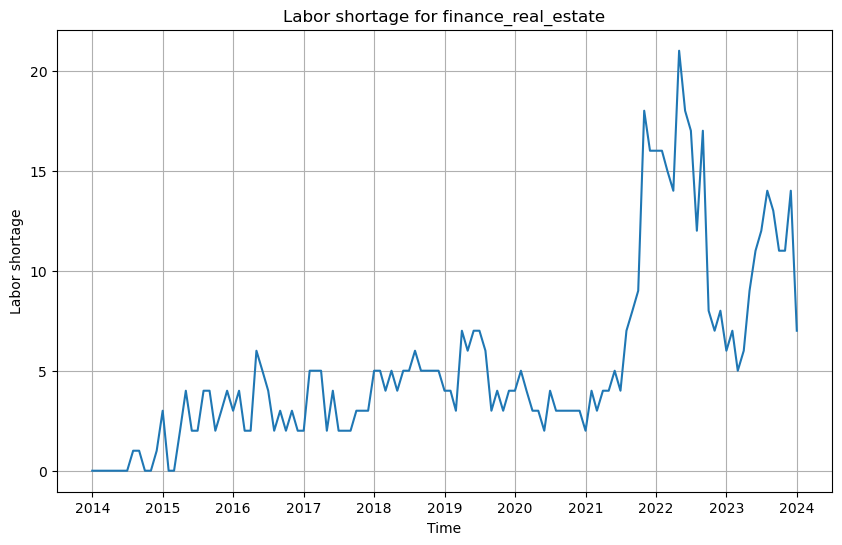

Dropdown(description='industry:', index=4, options=('culture_leisure', 'cleaning_etc', 'information_communicat…

In [10]:
from IPython.display import display, clear_output

# Converting 'time' column to a datetime format
lab_short_service['time'] = pd.to_datetime(lab_short_service['time'], format='%Y-%m-%d')

# We define a function to get labor shortage for a specific industry
def plot_industry(industry):

    clear_output(wait=True)

    # Filtering the data
    industry_data = lab_short_service[lab_short_service['industry'] == industry]

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(industry_data['time'], industry_data['labor_shortage'])
    plt.xlabel('Time')
    plt.ylabel('Labor shortage')
    plt.title(f'Labor shortage for {industry}')
    plt.grid(True)
    plt.show()

    # dropdown widget displayed
    display(industry_dropdown)

# creating widget to be able to select the industry
industry_dropdown = widgets.Dropdown(options=lab_short_service['industry'].unique(), description='industry:')
display(industry_dropdown)

def update_plot(change):
    plot_industry(change.new)

industry_dropdown.observe(update_plot, 'value')

The biggest labour shortage is in the cleaning industry with 50% of the firms having labour issues.

The lowest labour shortage is in the cleaning industry with about 7%.

**2) Interactive plot of development of amount of international employees for all sub-industries in the service sector**

As seen above, the trend of labor shortage for both the manufacturing and construction is going downwards, while the service sector is starting to go slightly upwards again. We therefor focus our energy on the service industry going forward.

Below is an interactive graph displaying the amount of international workers for the service sector as a total and for all seven sub-industries; finance, insurance, and real estate, hotels and restaurents, information and communication, cleaning and other operational services, transport, research and consultancy, and culture, leisure, and other services. 

In [11]:
import plotly.graph_objects as graph
from plotly.subplots import make_subplots

# Create a Plotly figure with a dropdown menu
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add traces for each variable/industry:
for column in int_labor.columns:
    fig.add_trace(graph.Scatter(x=int_labor.index, y=int_labor[column], mode='lines', name=column))

# Update layout to include a dropdown menu
buttons = []
for column in int_labor.columns:
    buttons.append(dict(method='restyle',
                        label=column,
                        visible=True,
                        args=[{'y': [int_labor[column]]}],
                        args2=[{'yaxis.type': 'log'}]))

fig.update_layout(updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}])

# Show the figure
fig.show()

print('Ann.: the code for this graph was made with help from AI. We tried to achieve the same using widgets, but it was not working')
print('When we asked AI for help, it suggested using plotly and subplots, adding traces for each industry in our dataset.')

Ann.: the code for this graph was made with help from AI. We tried to achieve the same using widgets, but it was not working
When we asked AI for help, it suggested using plotly and subplots, adding traces for each industry in our dataset.


Using the dropdown menu on the left, it allows to shift through all industries. 

The sub-industries of information and communication, research and consultancy, and transport show a clear upwards trend in international labor, while the overall industry and all other sub-industries show a slight downwards trend after mid/end 2023.

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [12]:
# Importing the original data from DST once again, as a new dataset
employees_2 = DstApi('LBESK03')

import dataproject
int_lb2 = dataproject.for_merging_json()

empl_industry = dataproject.dst_empl_merging(employees_2)

In [13]:
dataproject.checking_data(int_lb2,empl_industry)

Dates in empl_industry: <DatetimeArray>
['2014-08-01 00:00:00', '2016-09-01 00:00:00', '2018-11-01 00:00:00',
 '2014-04-01 00:00:00', '2014-09-01 00:00:00', '2016-07-01 00:00:00',
 '2020-01-01 00:00:00', '2015-12-01 00:00:00', '2017-04-01 00:00:00',
 '2018-03-01 00:00:00',
 ...
 '2018-12-01 00:00:00', '2019-10-01 00:00:00', '2022-04-01 00:00:00',
 '2022-09-01 00:00:00', '2014-06-01 00:00:00', '2016-02-01 00:00:00',
 '2016-03-01 00:00:00', '2017-02-01 00:00:00', '2018-02-01 00:00:00',
 '2021-06-01 00:00:00']
Length: 121, dtype: datetime64[ns]
Industries in empl_industry = ['hotels_restaurents' 'research_consultancy' 'cleaning_etc'
 'culture_leisure' 'transport' 'information_communication'
 'finance_insurance' 'real_estate' 'other_services'], total = 9
Dates in int_lb: <DatetimeArray>
['2014-08-01 00:00:00', '2015-04-01 00:00:00', '2015-12-01 00:00:00',
 '2016-08-01 00:00:00', '2018-04-01 00:00:00', '2018-12-01 00:00:00',
 '2017-08-01 00:00:00', '2019-04-01 00:00:00', '2019-12-01 00:00:0

In [14]:
merged = dataproject.merging_datasets(int_lb2,empl_industry)

Merge succesfull, the dataset now contains data on both total amount of employees and international employees


,industry,time,employees,int_empl
0,hotels_restaurents,2014-08-01,95344,20501
1,research_consultancy,2014-08-01,133456,9560
2,cleaning_etc,2014-08-01,136004,31169
3,culture_leisure,2014-08-01,108781,3446
4,transport,2014-08-01,638589,15603


Industries in the merged dataset: ['hotels_restaurents' 'research_consultancy' 'cleaning_etc'
 'culture_leisure' 'transport' 'information_communication'
 'finance_insurance' 'real_estate' 'other_services'], total = 9


In [15]:
# Adding a new column of observations: the respective share of international employees in each industry
merged['share'] = merged['int_empl'] / merged['employees']
merged['percentage'] = merged['share'].multiply(100)
display(merged.head(5))

,industry,time,employees,int_empl,share,percentage
0,hotels_restaurents,2014-08-01,95344,20501,0.215021,21.502140
1,research_consultancy,2014-08-01,133456,9560,0.071634,7.163410
2,cleaning_etc,2014-08-01,136004,31169,0.229177,22.917708
3,culture_leisure,2014-08-01,108781,3446,0.031678,3.167833
4,transport,2014-08-01,638589,15603,0.024434,2.443356


**A figure showing the proportion of foreign labor and labor shortage in the service industry**

In [20]:
# We merge lab_short_service with merged
merged_lab_short = pd.merge(lab_short_service, merged[['time', 'percentage']], on='time')

unique_years = merged_lab_short['time'].dt.year.unique()

# creating a dropdown menu
year_dropdown = widgets.Dropdown(options=unique_years, description='year')

# defining a function to find the plot based on year
def updated_plot(year):
    data_year = merged_lab_short[merged_lab_short['time'].dt.year == year]

    # Subplots for industries
    fig, axes = plt.subplots(nrows=1, ncols=len(data_year['industry'].unique()), figsize=(15, 5))

    for idx, industry in enumerate(data_year['industry'].unique()):
        industry_data = data_year[data_year['industry'] == industry]

        # plotting data
        axes[idx].bar(industry_data['industry'], industry_data['labor_shortage'], color='blue', label='labor shortage')
        axes[idx].bar(industry_data['industry'], industry_data['percentage'], color='red', alpha=0.5, label='Percentage of international employees')
        axes[idx].set_title(f'{industry} - {year}')
        axes[idx].set_xlabel('Industry')
        axes[idx].set_ylabel('Count / percentage')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

widgets.interactive(updated_plot, year=year_dropdown)

interactive(children=(Dropdown(description='year', options=(2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 20…

# Conclusion

In conclusion, reqruiting international workers to Denmark is an effort that can greatly benefit the Danish economy: International workers already make up a large share of the cleaning and hotel/restauration industries, which also score high in the labor shortage statistic, making them invaluable in keeping the problem at bay. We believe that increasing the scope of internationnal work in the country can help remedy labor shortage in other industries as well, which is why it is so important to create policies to increase the international work force in Denmark

This can be done by creating better conditions in and easier access to the Danish labor market for international citizens as well as pushing employers to broaden their horizons and utilize the international labor in order to decrease the lack of labor.